# t-Distributed Stochastic Neighbor Embedding: MNIST Digits

BUSMGT 7247

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.utils import shuffle
from sklearn.datasets import load_digits
from sklearn.manifold import TSNE

from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import (accuracy_score, classification_report,
                             precision_score, recall_score, f1_score)

from xgboost import XGBClassifier, XGBRegressor

# Options for plots
%matplotlib inline
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
sns.set()

# Seed the random number generator for reproducible results
random_state = 1000
np.random.seed(random_state)

In [2]:
# Load handwritten digits data
X, y = load_digits(return_X_y=True)

X, y = shuffle(X, y, random_state=random_state)
X[0, :].reshape(8, 8)

array([[ 0.,  0., 15., 14., 15.,  9.,  0.,  0.],
       [ 0.,  0., 12., 10.,  7.,  6.,  4.,  0.],
       [ 0.,  1., 14.,  2.,  0.,  0.,  0.,  0.],
       [ 0.,  5., 16., 12., 10.,  4.,  0.,  0.],
       [ 0.,  4., 11.,  8., 11., 15.,  5.,  0.],
       [ 0.,  0.,  0.,  0.,  0., 13.,  7.,  0.],
       [ 0.,  4., 16., 10., 11., 14.,  1.,  0.],
       [ 0.,  1., 10., 16., 15.,  4.,  0.,  0.]])

In [3]:
# Visualize the first few instances
_, ax = plt.subplots(1, 20)
for i, a in enumerate(ax):
    a.set_axis_off()
    a.imshow(X[i, :].reshape(8, 8), cmap=plt.cm.gray_r, interpolation='nearest')

In [4]:
# Labels of first instances
y[:20]

array([5, 4, 4, 4, 5, 2, 6, 2, 8, 1, 4, 1, 1, 0, 8, 1, 4, 1, 1, 3])

## Fit a Model on Original Dimensions

In [5]:
(X_train, X_test,
 y_train, y_test) = train_test_split(X, y, test_size=0.2,
                                     random_state=random_state)

In [6]:
# Create an XGBoost classifier and fit to training data
xgbclf = XGBClassifier(use_label_encoder=False,
                       eval_metric='mlogloss')

xgbclf.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='mlogloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=12,
              num_parallel_tree=1, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

In [7]:
# Evaluate on test data
y_pred = xgbclf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        40
           1       0.93      0.97      0.95        39
           2       0.94      1.00      0.97        29
           3       0.95      0.97      0.96        38
           4       1.00      0.95      0.97        38
           5       1.00      0.98      0.99        47
           6       1.00      0.97      0.99        35
           7       0.97      1.00      0.98        28
           8       0.97      0.92      0.94        37
           9       0.96      0.93      0.95        29

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360



## Reduce Dimensionality

In [8]:
# Fit t-SNE model
m = TSNE(n_components=2, random_state=random_state)
X_transform = m.fit_transform(X)

In [9]:
X_transform[:5]

array([[ 22.132921 ,   3.5898294],
       [-36.69757  ,  19.783525 ],
       [-53.114697 ,  13.104209 ],
       [-48.068962 ,  17.57481  ],
       [ 19.90109  ,   6.4140015]], dtype=float32)

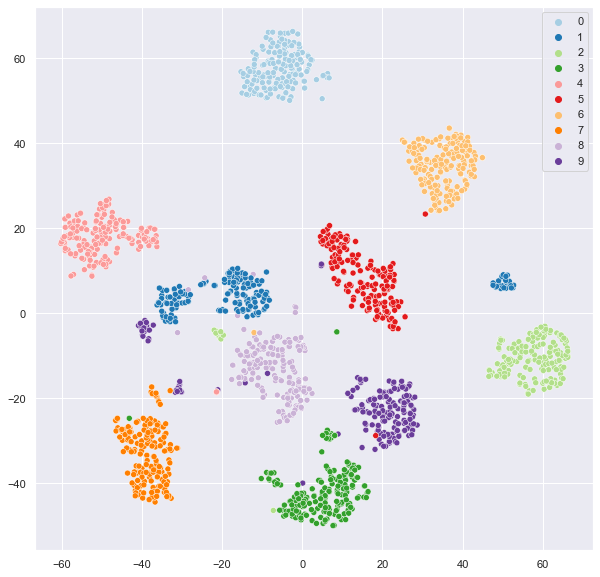

In [10]:
plt.subplots(figsize=(10, 10))
sns.scatterplot(x=X_transform[:, 0], y=X_transform[:, 1], hue=y,
                palette=sns.color_palette('Paired')[:10])
plt.show()

## Fit a Model to Reduced Dimensions

In [11]:
(X_train, X_test,
 y_train, y_test) = train_test_split(X_transform, y, test_size=0.2,
                                     random_state=random_state)

In [12]:
# Create an XGBoost classifier and fit to training data
xgbclf = XGBClassifier(use_label_encoder=False,
                       eval_metric='mlogloss')

xgbclf.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='mlogloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=12,
              num_parallel_tree=1, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

In [13]:
# Evaluate on test data
y_pred = xgbclf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       0.97      1.00      0.99        39
           2       1.00      1.00      1.00        29
           3       0.97      1.00      0.99        38
           4       1.00      1.00      1.00        38
           5       0.98      0.98      0.98        47
           6       1.00      1.00      1.00        35
           7       0.96      0.96      0.96        28
           8       0.97      0.97      0.97        37
           9       0.96      0.90      0.93        29

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360

